<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%204/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tugas Praktikum**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### 1. Buat Gamma Correction



> Rumus **I' = 255 * (I/255)^(1/gamma)**



 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


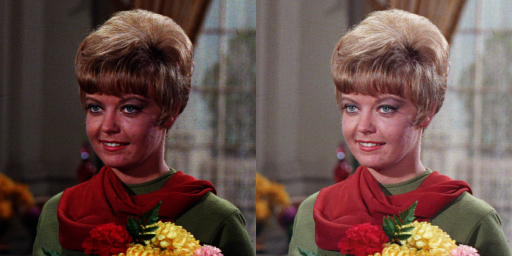

In [52]:
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/female.tiff')

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

# # Melakukan operasi Gamma Correction dengan menggunakan rumus I^gamma = 255 * (I/255)^(1/gamma).
# gamma_corrected = 255 * (original / 255) ** (1/gamma)

# # Mengonversi hasil Gamma Correction menjadi tipe data unsigned integer 8-bit agar dapat ditampilkan oleh OpenCV.
# gamma_corrected = np.uint8(gamma_corrected)

# Membuat array kosong dengan ukuran dan tipe data yang sama dengan citra asli.
gamma_corrected = np.zeros(original.shape, original.dtype)

# Looping pada setiap baris citra asli.
for y in range(original.shape[0]):
  # Looping pada setiap kolom citra asli.
  for x in range(original.shape[1]):
    # Looping pada setiap channel citra asli 
    for c in range(original.shape[2]):
     # Menghitung nilai gamma correction untuk setiap piksel di setiap channel,
     # lalu nilai tersebut dipotong (clipped) antara 0 dan 255. Hasilnya disimpan pada array gamma_corrected.
     gamma_corrected[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame)

### 2. Buat Simulasi Image Depth

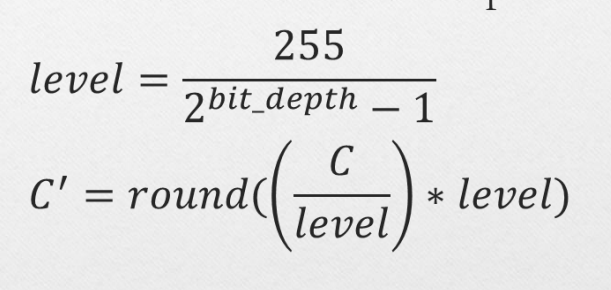

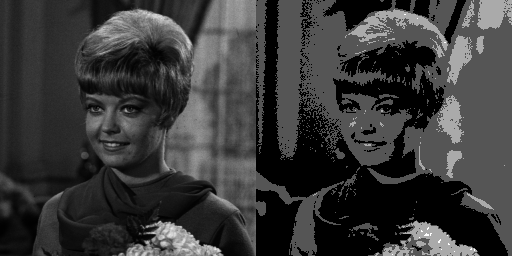

In [71]:
# membaca citra dengan format tiff dari direktori yang telah ditentukan dan menyimpannya ke dalam variabel
img_rgb = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/female.tiff')

# Mengubah citra dari mode warna ke greyscale menggunakan
# fungsi cv.cvtColor() dengan argumen citra awal img_rgb dan mode warna konversi cv.COLOR_BGR2GRAY.
original = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

# Membuat array numpy dengan ukuran dan tipe data yang sama dengan citra awal menggunakan fungsi np.zeros().
# Array ini nantinya akan diisi dengan nilai pixel hasil kuantisasi citra.
bitdepth_image = np.zeros(original.shape, original.dtype)

# Menentukan nilai bit kedalaman citra yang diinginkan, dalam kasus ini 2 bit.
bit = 2

# Menghitung nilai level kuantisasi dengan menggunakan formula level = (jumlah level - 1) / rentang nilai piksel ,
# dalam level ini jumlah levelnya adalah 2^2 (2 bit) dan rentang nilai piksel adalah 0-255 (8 bit).
level = 255 / (pow(2,bit)-1) 

# Melakukan looping untuk setiap baris pada citra grayscale.
for y in range(original.shape[0]):
  # Melakukan looping untuk setiap kolom pada citra grayscale.
  for x in range(original.shape[1]):
    # Pertama, nilai intensitas piksel pada citra grayscale dibagi dengan rentang nilai warna yang sudah ditentukan (level).
    # Hasil pembagian dibulatkan ke nilai terdekat dan dikalikan kembali dengan rentang nilai warna (level).
    # Kemudian, nilai hasil perhitungan tersebut dibatasi dalam rentang 0 sampai 255 agar sesuai dengan tipe data citra.
    bitdepth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, bitdepth_image))
cv2_imshow(final_frame)

### 3. Buat modul Average Denoising 

In [144]:
# import glob
# from math import log10, sqrt

# def average_images(num_images):
#     # Load the original image
#     original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/galaxy.jpg')

#     # Load the noisy images
#     cv_img = []
#     for img in sorted(glob.glob('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/noises/*.jpg')):
#         n = cv.imread(img)
#         cv_img.append(n)

#     # Perform averaging
#     dst = cv_img[0]
#     for i in range(1, num_images):
#         alpha = 1.0 / (i + 1)
#         beta = 1.0 - alpha
#         dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

#     dst = dst.astype('uint8') # Convert back to uint8

#     # Compute PSNR
#     def PSNR(original, compressed): 
#         mse = np.mean((original - compressed) ** 2) 
#         if(mse == 0):  # MSE is zero means no noise is present in the signal. 
#                       # Therefore PSNR have no importance. 
#             return 100
#         max_pixel = 255.0
#         psnr = 20 * log10(max_pixel / sqrt(mse)) 
#         return psnr

#     compressed = dst
#     psnr = PSNR(original, compressed)

#     galaxy_frame = cv.hconcat((original, dst))
#     cv2_imshow(galaxy_frame)
#     print('\n')
#     print('Nilai PSNR adalah',psnr,'(dB)')




Jumlah citra yang di-averaging: 5




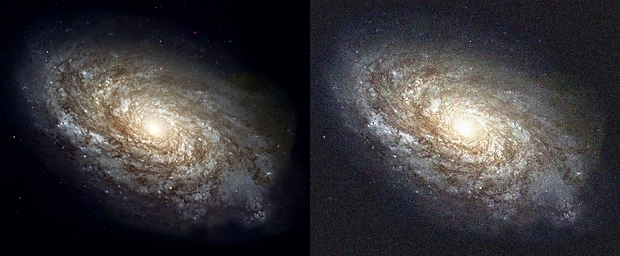



Nilai PSNR adalah 27.529561116310948 (dB)
___________________________________________________________________


Jumlah citra yang di-averaging: 30




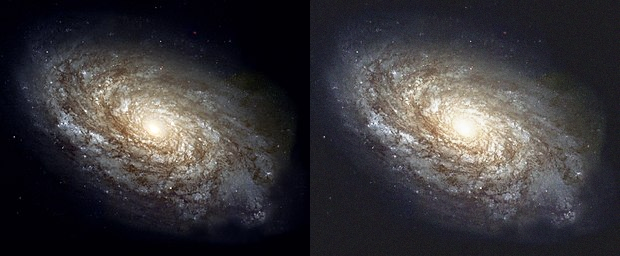



Nilai PSNR adalah 27.509719987043574 (dB)
___________________________________________________________________


Jumlah citra yang di-averaging: 60




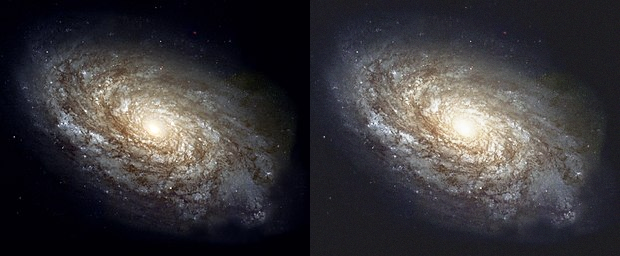



Nilai PSNR adalah 27.49252397268796 (dB)
___________________________________________________________________


Jumlah citra yang di-averaging: 80




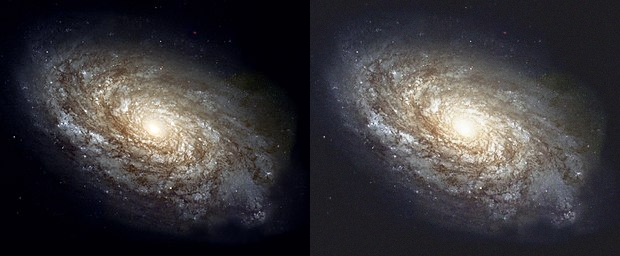



Nilai PSNR adalah 27.510604689759532 (dB)
___________________________________________________________________


Jumlah citra yang di-averaging: 100




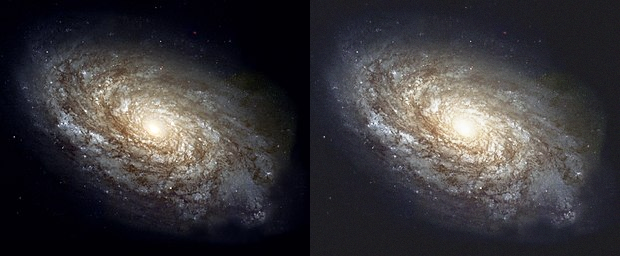



Nilai PSNR adalah 27.510938377802702 (dB)
___________________________________________________________________


In [152]:
import glob
from math import log10, sqrt

def average_images(num_images):
    # Load the original image
    original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/galaxy.jpg')

    # Load the noisy images
    cv_img = []
    for img in sorted(glob.glob('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/noises/*.jpg')):
        n = cv.imread(img)
        cv_img.append(n)

    # Perform averaging
    dst = cv_img[0]
    for i in range(1, num_images):
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    dst = dst.astype('uint8') # Convert back to uint8

    # Compute PSNR
    def PSNR(original, compressed): 
        mse = np.mean((original - compressed) ** 2) 
        if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                      # Therefore PSNR have no importance. 
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse)) 
        return psnr

    compressed = dst
    psnr = PSNR(original, compressed)

    galaxy_frame = cv.hconcat((original, dst))
    cv2_imshow(galaxy_frame)
    print('\n')
    print('Nilai PSNR adalah', psnr, '(dB)')
    print('___________________________________________________________________')

# Test the function with different number of images
num_images = [5, 30, 60, 80, 100]

for n in num_images:   
    print('\n')
    print('Jumlah citra yang di-averaging:', n)
    print('\n')
    average_images(n)    

### 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff)

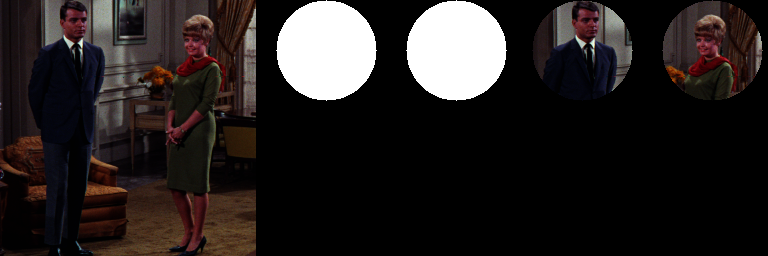

In [229]:
# contoh pada operator AND
original= cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/couple.tiff')

mask1 = np.zeros(original.shape, dtype=np.uint8)
cv.circle(mask1, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(original.shape, dtype=np.uint8)
cv.circle(mask2, (200, 50), 50, (255,255,255), -1)

combine_masked = original & (mask1+mask2)

final_frame = cv.hconcat((original, (mask1 + mask2), combine_masked))
cv2_imshow(final_frame)

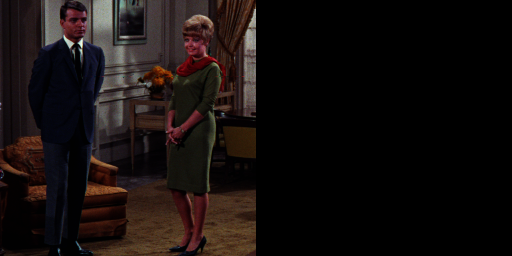

In [212]:
import cv2
import numpy as np

# Load the original image
img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/couple.tiff')

# Create the first mask
mask1 = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.circle(mask1, (80, 60), 40, 255, -1)

# Create the second mask
mask2 = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.circle(mask2, (200, 60), 40, 255, -1)

# Apply the masks to the image using bitwise AND
masked_img1 = cv2.bitwise_and(img, img, mask=mask1)
masked_img2 = cv2.bitwise_and(img, img, mask=mask2)

# Combine the masks using logical AND
combined_mask = cv2.bitwise_and(mask1, mask2)

# Apply the combined mask to the image using bitwise AND
masked_img = cv2.bitwise_and(img, img, mask=combined_mask)

# Concatenate the images horizontally
combined_frame = np.concatenate((img, masked_img1, masked_img2, masked_img), axis=1)

# Display the final result
cv2_imshow(combined_frame)